# Telco Customer Churn Prediction Using Artificial Neural Network

In this project, the objective are:

* To handle imbalance classification dataset
* To build predictive model using ANN by Tensorflw

# Data

data soruce is from: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load and read csv file
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory data analysis

In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

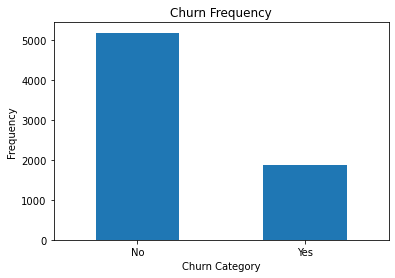

In [5]:
df.Churn.value_counts().plot(kind='bar')
plt.title('Churn Frequency')
plt.xlabel('Churn Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0);

In [6]:
pd.crosstab(df['gender'],df['Churn'])

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


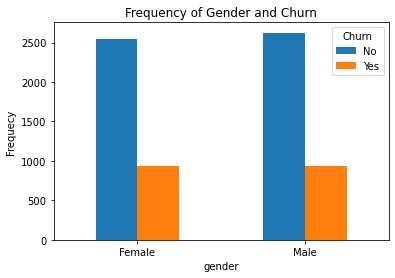

In [7]:
pd.crosstab(df['gender'],df['Churn']).plot(kind='bar')
plt.title('Frequency of Gender and Churn')
plt.ylabel('Frequecy ')
plt.xticks(rotation=0);

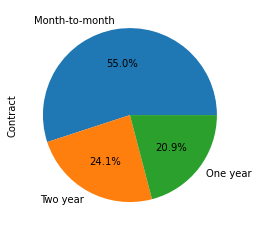

In [8]:
df.Contract.value_counts().plot(kind='pie',autopct='%1.1f%%');

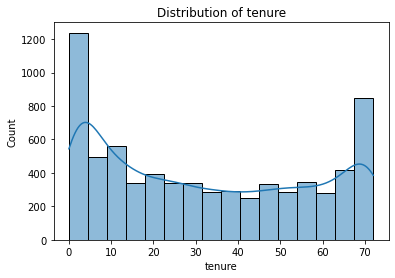

In [9]:
sns.histplot(df.tenure,kde=True)
plt.title('Distribution of tenure');

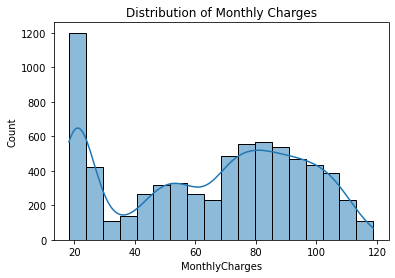

In [10]:
sns.histplot(df.MonthlyCharges,kde=True);
plt.title('Distribution of Monthly Charges');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


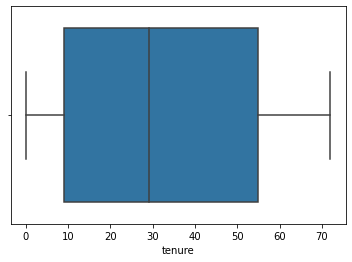

In [11]:
sns.boxplot(df.tenure);

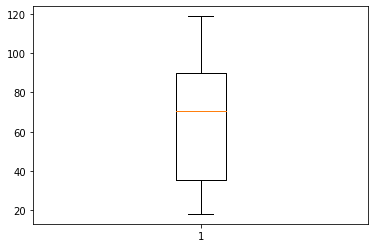

In [12]:
plt.boxplot(df.MonthlyCharges);

## Data Cleaning

In [13]:
#Dropping customer ID column as it is not useful in our project
df.drop('customerID',axis=1,inplace=True)

In [14]:
for column in df:
    if df[column].dtypes=='object':
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [16]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df['TotalCharges'].fillna(df.TotalCharges.median(),inplace=True)

In [18]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
for col in df:
    if df[col].dtypes=='object':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])
        print(f'{col} : {df[col].unique()}')

gender : [0 1]
Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [1 0 2]
InternetService : [0 1 2]
OnlineSecurity : [0 2 1]
OnlineBackup : [2 0 1]
DeviceProtection : [0 2 1]
TechSupport : [0 2 1]
StreamingTV : [0 2 1]
StreamingMovies : [0 2 1]
Contract : [0 1 2]
PaperlessBilling : [1 0]
PaymentMethod : [2 3 0 1]
Churn : [0 1]


In [21]:
# check datatype for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## Correlation Analysis

In [22]:
corr_matrix = df.corr().round(2)
corr_matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.02,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,-0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.29,-0.01,-0.15,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.30,0.67,0.01,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.02,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,-0.00,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.04,-0.03,0.11,0.10,0.10,-0.14,0.09,-0.32,-0.18,-0.05
OnlineSecurity,-0.02,-0.13,0.15,0.15,0.33,-0.02,0.01,-0.03,1.00,0.19,0.18,0.29,0.04,0.06,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.19,1.00,0.19,0.20,0.15,0.14,0.28,-0.01,-0.12,0.12,0.38,-0.20


In [23]:
corr_matrix['Churn']

gender             -0.01
SeniorCitizen       0.15
Partner            -0.15
Dependents         -0.16
tenure             -0.35
PhoneService        0.01
MultipleLines       0.04
InternetService    -0.05
OnlineSecurity     -0.29
OnlineBackup       -0.20
DeviceProtection   -0.18
TechSupport        -0.28
StreamingTV        -0.04
StreamingMovies    -0.04
Contract           -0.40
PaperlessBilling    0.19
PaymentMethod       0.11
MonthlyCharges      0.19
TotalCharges       -0.20
Churn               1.00
Name: Churn, dtype: float64

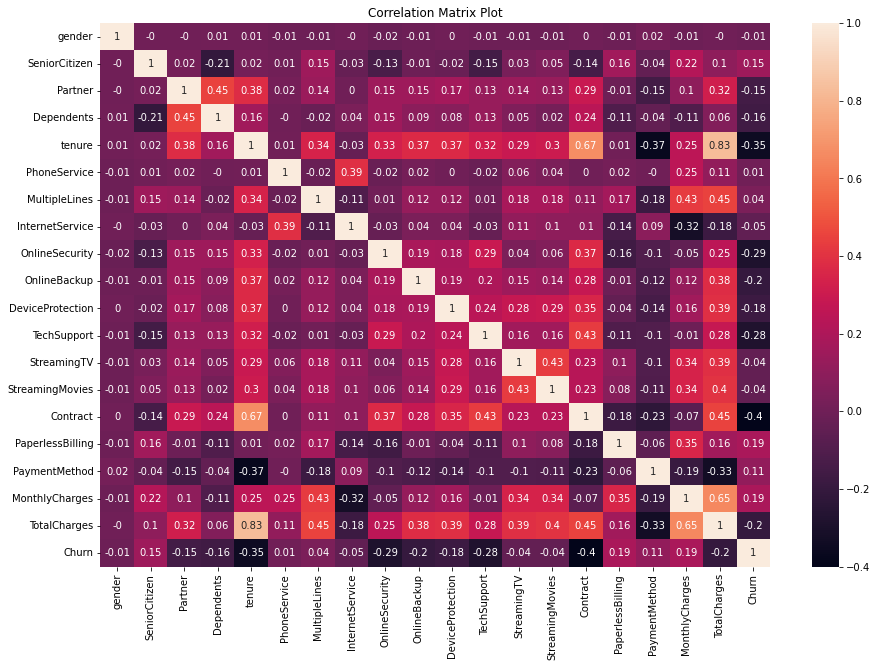

In [24]:
plt.figure(figsize=(15,10))

sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix Plot');

## Modelling with tensorflow

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Split X - features and y -target

X = df.drop('Churn',axis=1)
y = df['Churn']

# to ensure reproducibilty
np.random.seed(42)

# split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
# model instatiantion
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(19,)),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

# model compile 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# fit model
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
177/177 [==============================] - 1s 973us/step - loss: 41.3273 - accuracy: 0.6857
Epoch 2/10
177/177 [==============================] - 0s 935us/step - loss: 0.7958 - accuracy: 0.7141
Epoch 3/10
177/177 [==============================] - 0s 923us/step - loss: 0.5524 - accuracy: 0.7609
Epoch 4/10
177/177 [==============================] - 0s 932us/step - loss: 0.5536 - accuracy: 0.7639
Epoch 5/10
177/177 [==============================] - 0s 965us/step - loss: 0.5816 - accuracy: 0.7685
Epoch 6/10
177/177 [==============================] - 0s 902us/step - loss: 0.5887 - accuracy: 0.7666
Epoch 7/10
177/177 [==============================] - 0s 905us/step - loss: 0.5974 - accuracy: 0.7627
Epoch 8/10
177/177 [==============================] - 0s 903us/step - loss: 0.5630 - accuracy: 0.7707
Epoch 9/10
177/177 [==============================] - 0s 939us/step - loss: 0.5841 - accuracy: 0.7666
Epoch 10/10
177/177 [==============================] - 0s 939us/step - loss: 0.56

In [27]:
y_preds = model.predict(X_test)
np.round(y_preds)

45/45 [==============================] - 0s 799us/step


array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [28]:
print(classification_report(y_test,np.round(y_preds)))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.68      0.38      0.48       373

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409



As we can see recall on minority class is 0.38 and f1-score on minority class is 0.48 which are bad. The accuracy score is not reliable in this type of problem which is imbalanced dataset

## Handling imbalanced dataset

There are 5 ways to handle imbalanced dataset:

1. Undersampling majority class
2. Oversampling minority class by duplication
3. Oversampling minority class using SMOTE
4. Ensemble method
5. Focal

In this notebook we will use `Oversampling minority class by duplication`

Process in order to avoid data leakage:

0. Split X and y
1. Split using train test split
2. Combine X_train and y_train into a DataFrame
3. Separate the majority and minority classes
4. Determine the size of the majority class
5. Combine the resampled minority class with the majority class
6. Separate features and labels

In [29]:
# 0. Split and y
X = df.drop('Churn',axis=1)
y = df['Churn']

# 1. Split train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [30]:
# 2. Combine X_train and y_train

train_data = pd.concat([X_train,y_train],axis=1)
train_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1510,1,0,1,0,71,1,2,0,2,2,2,2,0,2,2,0,1,80.40,5727.15,0
2295,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,25.15,25.15,1
1580,0,1,1,0,21,1,2,0,0,2,2,0,0,2,1,0,0,71.70,1497.05,0
1149,1,0,1,1,13,1,0,1,0,0,2,0,2,2,0,1,3,96.65,1162.85,1
6182,1,0,1,1,72,1,2,0,2,2,2,2,2,2,2,0,1,88.70,6501.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040,1,0,1,0,71,1,2,0,2,2,2,2,2,2,2,0,0,90.55,6404.00,0
1589,0,1,0,0,7,1,0,0,0,2,2,0,2,0,0,1,2,64.95,493.65,0
4019,1,0,0,0,14,1,2,1,0,2,0,0,2,2,0,1,2,100.55,1415.55,1
6536,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3,24.40,24.40,0


In [31]:
# 3. Seperate the majority and minority classes in the training set

class_churn_0 = train_data[train_data['Churn']==0]
class_churn_1 = train_data[train_data['Churn']==1]

In [32]:
class_churn_0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1510,1,0,1,0,71,1,2,0,2,2,2,2,0,2,2,0,1,80.40,5727.15,0
1580,0,1,1,0,21,1,2,0,0,2,2,0,0,2,1,0,0,71.70,1497.05,0
6182,1,0,1,1,72,1,2,0,2,2,2,2,2,2,2,0,1,88.70,6501.35,0
5391,0,0,0,0,6,0,1,0,0,0,0,2,2,2,1,1,3,49.25,255.60,0
1461,1,0,1,0,22,1,2,1,2,0,0,2,2,0,0,0,1,95.90,2234.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0,0,1,1,71,1,2,1,2,0,2,2,0,2,2,0,2,100.45,7159.70,0
2040,1,0,1,0,71,1,2,0,2,2,2,2,2,2,2,0,0,90.55,6404.00,0
1589,0,1,0,0,7,1,0,0,0,2,2,0,2,0,0,1,2,64.95,493.65,0
6536,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3,24.40,24.40,0


In [33]:
class_churn_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2295,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,25.15,25.15,1
1149,1,0,1,1,13,1,0,1,0,0,2,0,2,2,0,1,3,96.65,1162.85,1
113,0,1,1,0,37,1,2,1,0,0,0,0,0,0,0,1,2,76.50,2868.15,1
2617,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,19.60,19.60,1
1786,0,0,0,0,38,1,0,1,0,2,2,2,0,0,0,1,1,84.25,3264.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5165,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.65,69.65,1
3383,1,0,1,0,6,1,2,1,0,0,0,0,0,0,0,1,2,75.50,438.00,1
5518,1,0,1,1,30,1,2,1,2,2,0,0,2,0,0,1,2,94.40,2838.70,1
3352,0,0,0,0,1,1,2,1,0,0,0,0,0,2,0,1,3,85.45,85.45,1


In [34]:
# 4. Determine the size of the majority class

majority_class_len = len(class_churn_0)
majority_class_len

4139

In [35]:
from sklearn.utils import resample

# 5. Resample the minority class to match the size of the majority class
class_churn_1_resampled = resample(class_churn_1,
                                  n_samples=majority_class_len,
                                  replace=True,
                                  random_state=42)



In [36]:
len(class_churn_1_resampled)

4139

In [37]:
# 6. Combine the resampled minority class with the majority class
resampled_train_data = pd.concat([class_churn_0,class_churn_1_resampled],
                                 axis=0)

In [38]:
resampled_train_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1510,1,0,1,0,71,1,2,0,2,2,2,2,0,2,2,0,1,80.40,5727.15,0
1580,0,1,1,0,21,1,2,0,0,2,2,0,0,2,1,0,0,71.70,1497.05,0
6182,1,0,1,1,72,1,2,0,2,2,2,2,2,2,2,0,1,88.70,6501.35,0
5391,0,0,0,0,6,0,1,0,0,0,0,2,2,2,1,1,3,49.25,255.60,0
1461,1,0,1,0,22,1,2,1,2,0,0,2,2,0,0,0,1,95.90,2234.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,0,0,1,0,41,1,2,1,2,2,2,2,2,2,0,1,0,113.60,4594.95,1
4771,0,0,0,0,3,1,0,1,0,0,0,0,2,0,0,1,2,79.40,244.65,1
5388,1,0,1,1,1,1,0,2,1,1,1,1,1,1,0,0,3,19.90,19.90,1
238,0,1,0,0,11,1,0,1,0,2,0,0,2,2,0,1,2,95.00,1120.30,1


In [39]:
4150*2 == len(resampled_train_data)

False

In [40]:
# Seperate feature and label

X_train_sampled = resampled_train_data.drop('Churn',axis=1)

y_train_sampled = resampled_train_data['Churn']

In [41]:
X_train_sampled.shape

(8278, 19)

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train_sampled.shape[1],)),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_sampled,y_train_sampled,epochs=10)

Epoch 1/10
259/259 [==============================] - 1s 940us/step - loss: 14.5563 - accuracy: 0.6709
Epoch 2/10
259/259 [==============================] - 0s 919us/step - loss: 0.7625 - accuracy: 0.7144
Epoch 3/10
259/259 [==============================] - 0s 937us/step - loss: 0.7427 - accuracy: 0.7177
Epoch 4/10
259/259 [==============================] - 0s 946us/step - loss: 0.5995 - accuracy: 0.7329
Epoch 5/10
259/259 [==============================] - 0s 909us/step - loss: 0.6088 - accuracy: 0.7298
Epoch 6/10
259/259 [==============================] - 0s 897us/step - loss: 0.6248 - accuracy: 0.7389
Epoch 7/10
259/259 [==============================] - 0s 885us/step - loss: 0.5872 - accuracy: 0.7371
Epoch 8/10
259/259 [==============================] - 0s 896us/step - loss: 0.6816 - accuracy: 0.7283
Epoch 9/10
259/259 [==============================] - 0s 910us/step - loss: 0.5520 - accuracy: 0.7481
Epoch 10/10
259/259 [==============================] - 0s 901us/step - loss: 0.56

In [43]:
y_preds=model.predict(X_test)
np.round(y_preds)

45/45 [==============================] - 0s 753us/step


array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [44]:
print(classification_report(y_test,np.round(y_preds)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1035
           1       0.58      0.70      0.64       374

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.79      0.79      1409



In [46]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,np.round(y_preds))
conf_mat

array([[849, 186],
       [113, 261]], dtype=int64)

<AxesSubplot:>

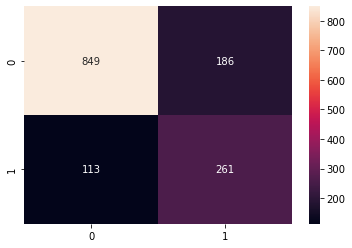

In [49]:
sns.heatmap(conf_mat,annot=True,fmt='d')

In [50]:
(849+261)/(849+261+186+113)

0.7877927608232789